In [25]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

In [2]:
# Read in CSV, parse dates, and set index
df = pd.read_csv(Path('../Resources/IVV.csv'), parse_dates=True, index_col='date')

In [10]:
# Display bottom rows
df.tail(15)

,open,high,low,close,volume
date,,,,,
2018-12-10,265.34,267.12,260.51,266.00,8522734
2018-12-11,269.61,269.82,264.41,266.05,4526472
2018-12-12,269.48,270.94,267.35,267.49,3879381
2018-12-13,268.44,269.46,266.07,267.24,5215783
2018-12-14,264.90,265.97,261.75,262.40,6080506
2018-12-17,259.98,261.11,253.94,255.65,9320620
2018-12-18,257.67,258.35,253.71,255.62,10267622
2018-12-19,255.59,259.83,249.73,251.74,13166466
2018-12-20,250.22,251.94,244.98,247.43,13684373


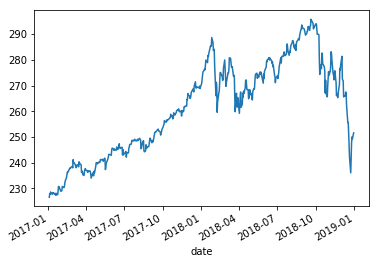

In [4]:
# Plot closing price
df.close.plot()

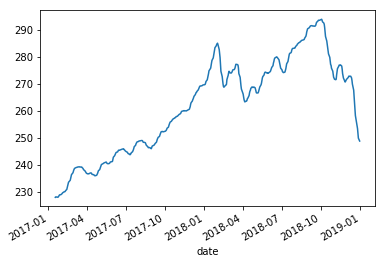

In [5]:
# Moving average. Each value is the average of previous 10 values.
df.close.rolling(window=10).mean().plot()

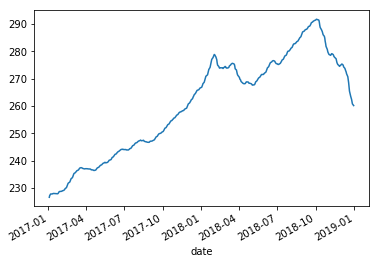

In [6]:
# Exponentially-Weighted Moving Average
df.close.ewm(halflife=10).mean().plot()

In [16]:
#Hodrick-Prescott filter
import statsmodels.api as sm
ts_noise, ts_trend = sm.tsa.filters.hpfilter(df['close'])

TypeError: unsupported operand type(s) for *: 'AxesSubplot' and 'AxesSubplot'

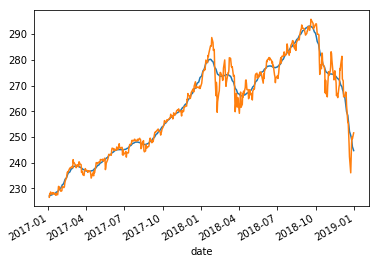

In [19]:
# Plot the trend
ts_trend.plot() * df.close.plot()

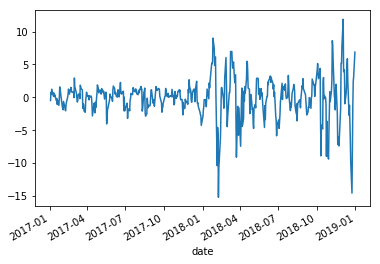

In [18]:
# Plot the noise
ts_noise.plot()

TypeError: unsupported operand type(s) for *: 'AxesSubplot' and 'AxesSubplot'

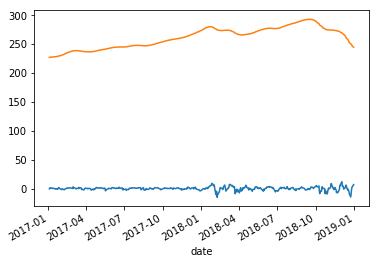

In [20]:
ts_noise.plot() * ts_trend.plot()

In [23]:
full_series = ts_noise + ts_trend

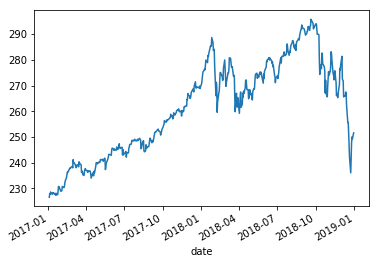

In [24]:
full_series.plot()